In [101]:
# https://medium.com/@AnasBrital98/introduction-to-support-vector-machine-2a2091401858

In [102]:
# TODO: multi-class??  https://www.baeldung.com/cs/svm-multiclass-classification


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from util import DataGenerator, DataPlotter
from sklearn.metrics import accuracy_score
np.random.seed(42)


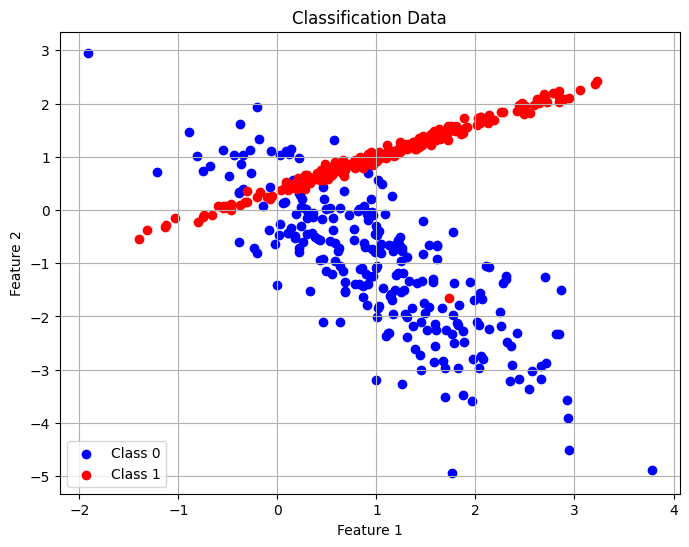

In [208]:
num_samples = 500
num_features = 2

type = "regression"
type = "classification"

if type == "classification":
    num_classes = 2

gen = DataGenerator(num_samples, num_features, num_classes)
X,y = gen.get_data(type=type)
initial = X.copy()

plotter = DataPlotter()
plotter.plot_data(X,y, type, num_classes)

# Binary classification without kernels
classes are -1 to 1 when training


In [105]:
num_samples, num_features = X.shape

w = np.zeros(num_features)
b = 0

y_ = np.where(y==0 , -1 , 1)

learning_rate = 0.01
lambda_parameter  = 0.01
max_iter = 1000

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        yi =  y_[idx] 
        condition = yi * (np.dot(xi, w) - b) >= 1
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
        w -= learning_rate * dw
        b -= learning_rate * db
        

predictions = np.sign(np.dot(X , w) - b)

accuracy_score(y_, predictions)


0.902

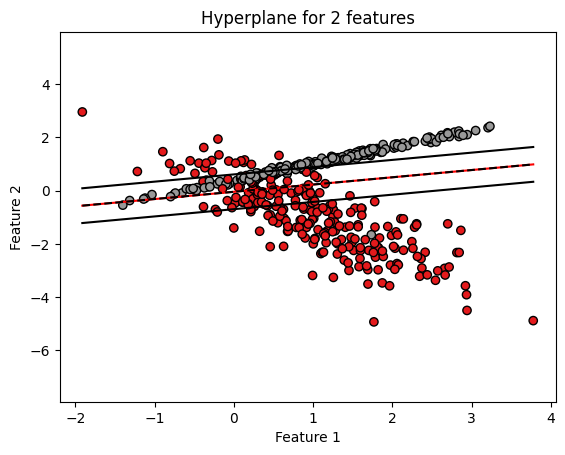

In [106]:
def visaulize_support_vectors_analytically(X,w,b):
    fig , ax = plt.subplots()
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
    
    x0_min = np.amin(X[:,0])
    x0_max = np.amax(X[:,0])
    
    x1_x_for_separator = (-w[0] * x0_min + b + 0 ) / w[1]
    x1_y_for_separator = (-w[0] * x0_max + b + 0 ) / w[1]
    
    x1_x_for_class1 = (-w[0] * x0_min + b -1 ) / w[1]
    x1_y_for_class1 = (-w[0] * x0_max + b -1 ) / w[1]
    
    x1_x_for_class2 = (-w[0] * x0_min + b + 1 ) / w[1]
    x1_y_for_class2 = (-w[0] * x0_max + b + 1 ) / w[1]
    
    ax.plot([x0_min , x0_max] , [x1_x_for_separator , x1_y_for_separator] , "red")
    ax.plot([x0_min , x0_max] , [x1_x_for_class1 , x1_y_for_class1] , "black")
    ax.plot([x0_min , x0_max] , [x1_x_for_class2 , x1_y_for_class2] , "black")
    
    hyperplane_slope = -w[0] / w[1]
    hyperplane_intercept = b / w[1]
    x_values = np.linspace(x0_min, x0_max, 10)
    y_values = hyperplane_slope * x_values + hyperplane_intercept 
    plt.plot(x_values, y_values, color='k', linestyle='--')
    
    x1_min = np.amin(X[:, 1])
    x1_max = np.amax(X[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])
    
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Hyperplane for 2 features')
    plt.show()
    
visaulize_support_vectors_analytically(X,w,b)

# Binary classifier svm with kernel options


In [152]:
# kernels return a matrix of shape -> (num_samples,num_samples)

def linear_kernel(X1,X2):
    return np.dot(X1, X2.T)
    
def polynomial_kernel(X1, X2, degree = 2, bias = 1):
    return (np.dot(X1, X2.T) + bias) ** degree

# def rbf_kernel(X1, X2, sigma=1.0):
#     pairwise_distances_sq = np.sum((X1[:, np.newaxis, :] - X2) ** 2, axis=2)
#     return np.exp(-sigma * pairwise_distances_sq)

def rbf_kernel(x1,x2, sigma = 1): # gaussian kernel
    def similarity(x,l, sigma):
        return np.exp(-sum((x-l)**2)/(2*sigma**2))
    m=x2.shape[0]; n=x1.shape[0]
    op=[[similarity(x1[x_index],x2[l_index], sigma) for l_index in range(m)] for x_index in range(n)]
    return np.array(op)
    
def sigmoid_kernel(X1, X2, alpha=1.0, bias=0.0):
    linear_term = alpha * np.dot(X1, X2.T)
    return np.tanh(linear_term + bias)



X, y = gen.get_data(type=type)

sigmoid_kernel(X,X).shape

(500, 500)

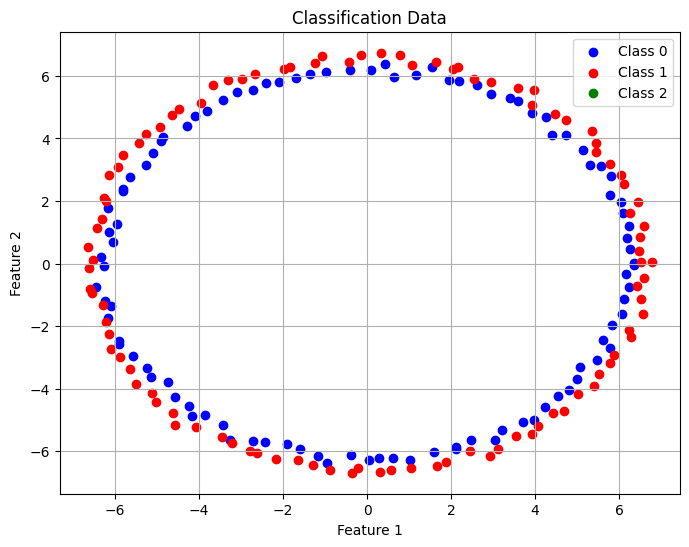

In [205]:
X, y = gen.get_radial_data()
initial = X.copy()
plotter.plot_data(X, y)

In [209]:
kernel = "sigmoid"

if kernel == "linear":
    X=linear_kernel(X,X)
elif kernel == "poly":
    X=polynomial_kernel(X,X, degree = 5)
elif kernel == "rbf": 
    X=rbf_kernel(X,X) 
elif kernel == "sigmoid": 
    X=sigmoid_kernel(X,X) 

num_samples, num_features = X.shape
w = np.zeros(num_features)
b = 0
learning_rate = 0.01
lambda_parameter  = 0.01
max_iter = 1000

y_ = np.where(y==0 , -1 , 1)

for _ in range(max_iter):
    for idx, xi in enumerate(X):
        yi =  y_[idx] 
        condition = yi * (np.dot(xi, w) - b) >= 1
        
        if condition :
            dw = 2 * lambda_parameter * w
            db = 0
        else :
            dw = 2 * lambda_parameter * w - np.dot(xi , yi)
            db = yi
        w -= learning_rate * dw
        b -= learning_rate * db
        
def predict(X, initial=None, kernel = "none"):
    if kernel == "linear":
        X=linear_kernel(X,initial)
    elif kernel == "poly":
        X=polynomial_kernel(X,initial, degree = 5)
    elif kernel == "rbf": 
        X=rbf_kernel(X,initial) 
    elif kernel == "sigmoid": 
        X=sigmoid_kernel(X,initial) 
        
    return np.sign(np.dot(X , w) - b)

        
predictions = predict(initial,initial=initial, kernel = kernel)

accuracy_score(y_, predictions)


0.936

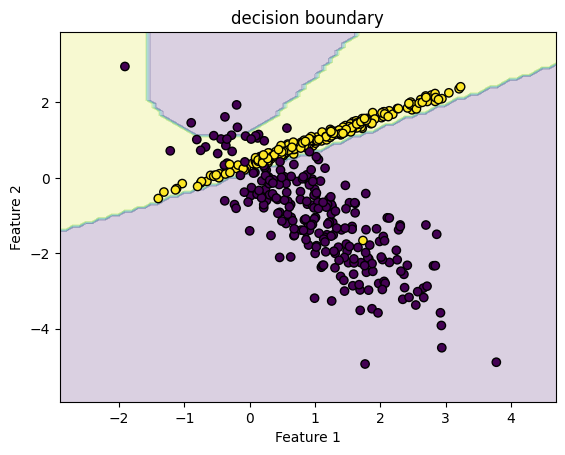

In [210]:
def plot_decision_boundary(predict_func, X, y, kernel = "rbf", title = "decision boundary"):
    # Create meshgrid for visualization
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict classes for each point in meshgrid
    Z = np.c_[xx.ravel(), yy.ravel()]
    Z = predict_func(Z,initial,kernel)
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.2)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Example usage:
# Assuming predict_func(X) returns predicted classes for tall matrix X
plot_decision_boundary(predict, initial, y_, kernel=kernel, title=kernel)

